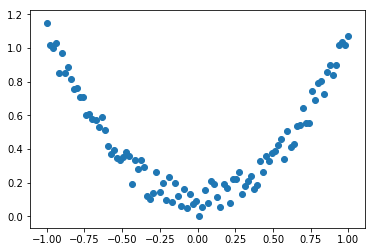

In [4]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(
    torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2 * torch.rand(
    x.size())  # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())

In [5]:
from xenonpy.model.nn import Layer1d, Sequential

def Net(n_feature, n_hidden, n_output):
    return Sequential(
        Layer1d(n_in=n_feature, n_out=n_hidden),  # hidden layer
        Layer1d(n_in=n_hidden, n_out=n_output, act_func=None, batch_nor=None),  # output layer
    )


net = Net(n_feature=1, n_hidden=10, n_output=1)  # define the network
net

Sequential(
  (0): Layer1d(
    (layer): Linear(in_features=1, out_features=10, bias=True)
    (batch_nor): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
  )
  (1): Layer1d(
    (layer): Linear(in_features=10, out_features=1, bias=True)
  )
)

epochs: 0, loss: 0.3901776373386383
epochs: 5, loss: 0.024115275591611862
epochs: 10, loss: 0.010036683641374111
epochs: 15, loss: 0.008018256165087223
epochs: 20, loss: 0.007364660035818815
epochs: 25, loss: 0.007082449272274971
epochs: 30, loss: 0.00689386110752821
epochs: 35, loss: 0.006721676327288151
epochs: 40, loss: 0.006560519337654114
epochs: 45, loss: 0.00641764746978879
epochs: 50, loss: 0.006277829874306917
epochs: 55, loss: 0.006145135499536991
epochs: 60, loss: 0.006015152670443058
epochs: 65, loss: 0.005888509098440409
epochs: 70, loss: 0.005739185493439436
epochs: 75, loss: 0.005611214321106672
epochs: 80, loss: 0.005501782055944204
epochs: 85, loss: 0.005401167552918196
epochs: 90, loss: 0.005305890459567308
epochs: 95, loss: 0.005206601228564978
epochs: 100, loss: 0.005092944018542767
epochs: 105, loss: 0.004988218192011118
epochs: 110, loss: 0.004892555996775627
epochs: 115, loss: 0.004805737175047398
epochs: 120, loss: 0.004724815953522921
epochs: 125, loss: 0.00465

Text(0.5, 0, 'Loss=0.0038')

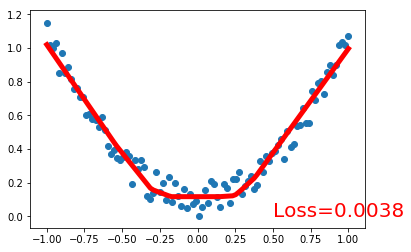

In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

for t in range(200):
    prediction = net(x)  # input x and predict based on x

    loss = loss_func(prediction, y)  # must be (1. nn output, 2. target)

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 5 == 0:
        # show learning process
        print('epochs: {}, loss: {}'.format(t, loss.item()))
        
# show o-p    
plt.cla()
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy().flatten(), 'r-', lw=5)
plt.text(
    0.5,
    0,
    'Loss=%.4f' % loss.item(),
    fontdict={
        'size': 20,
        'color': 'red'
    })